# World Happiness Report Project
# Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

# What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
happy=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


 # data visualisation

In [6]:
happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

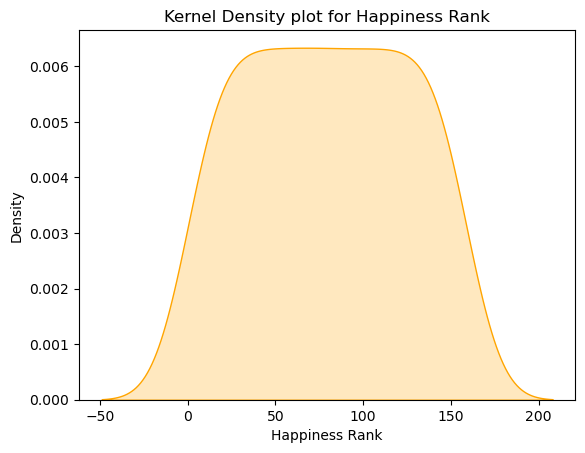

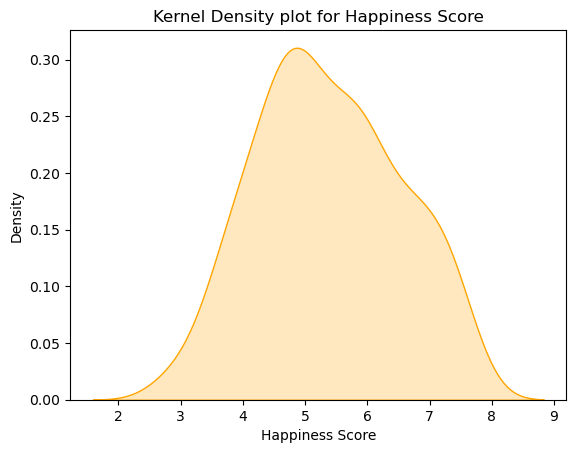

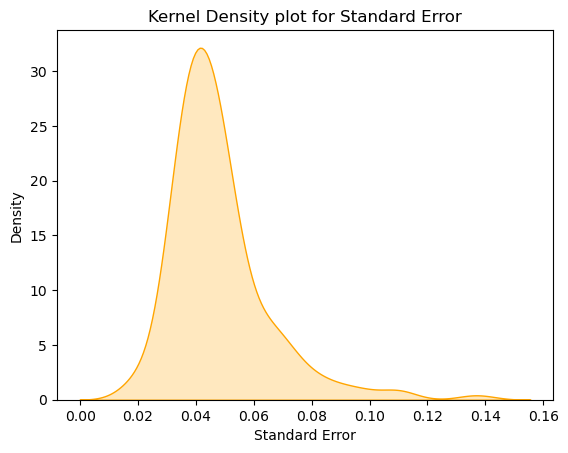

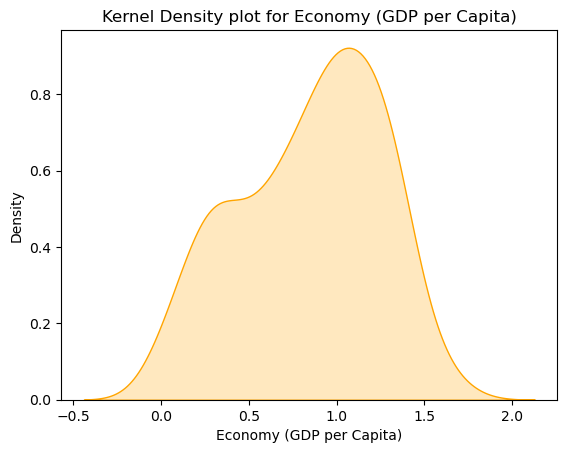

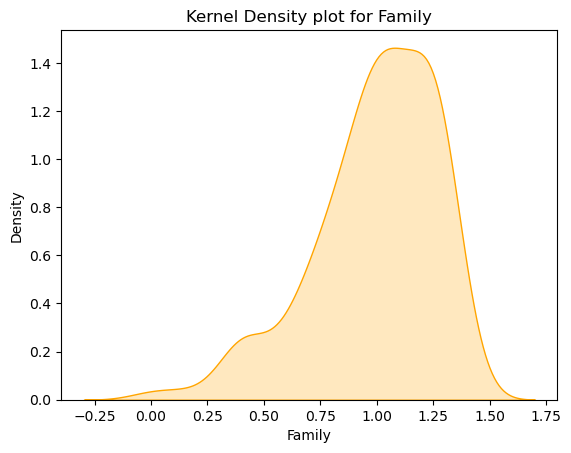

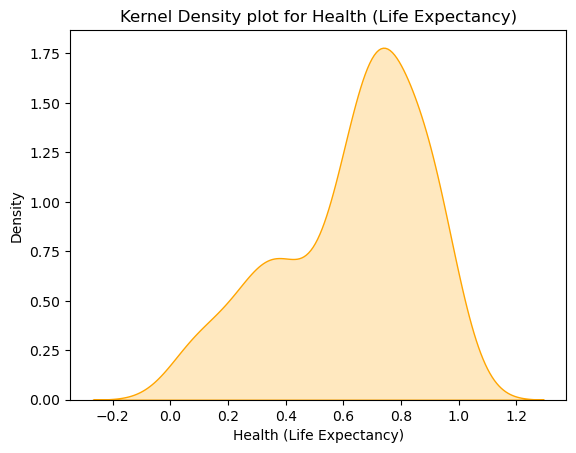

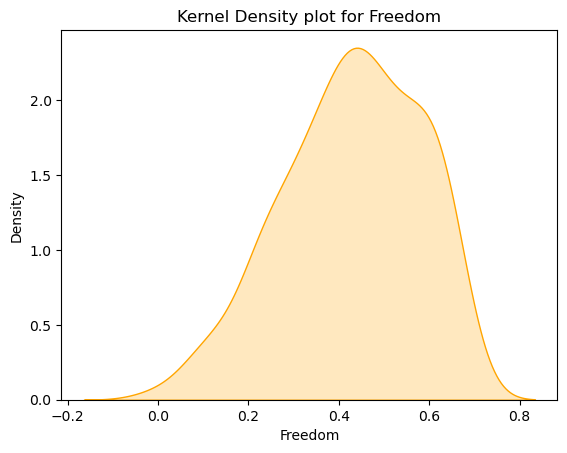

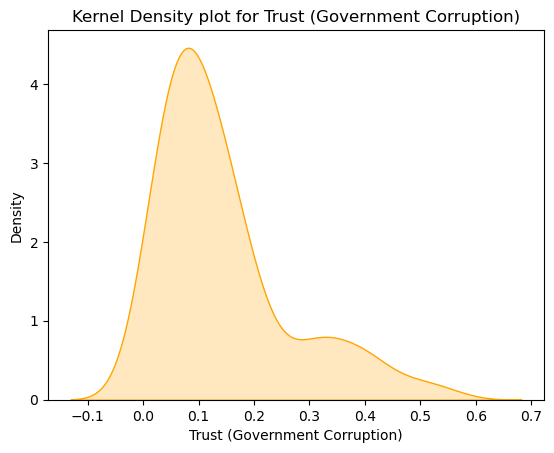

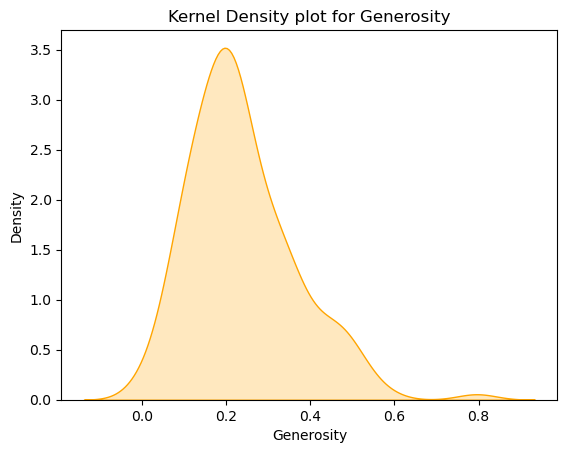

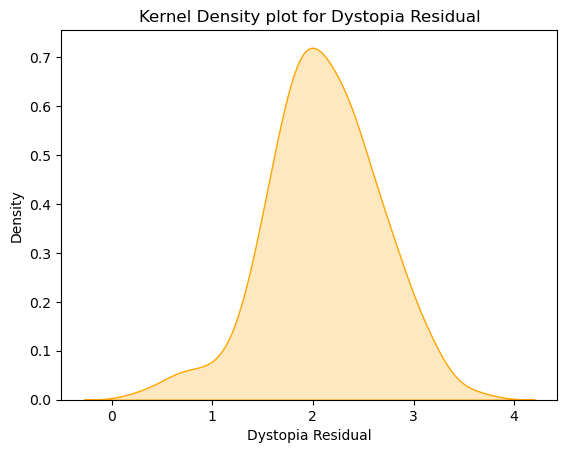

In [7]:
def generate_kde_plots(data, columns, color='orange'):
    for column in columns:
        sns.kdeplot(data=data[column], shade=True, color=color).set(
            xlabel=column,
            ylabel='Density',
            title=f'Kernel Density plot for {column}'
        )
        plt.show()

columns_to_include = ['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
happy=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

generate_kde_plots(happy, columns_to_include)

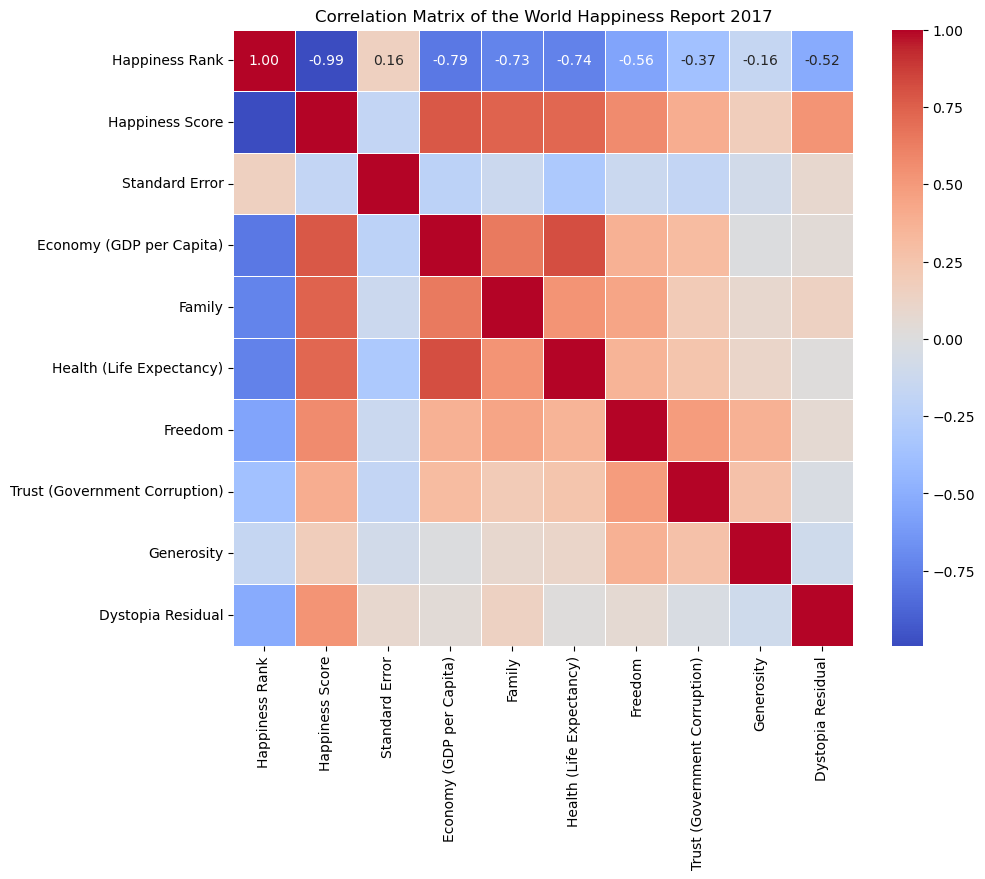

In [8]:

columns_of_interest = ['Happiness Rank', 'Happiness Score', 'Standard Error', 
                      'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                      'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                      'Dystopia Residual']

# Select the columns of interest and calculate the correlation matrix
correlation_matrix = happy[columns_of_interest].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the World Happiness Report 2017')
plt.show()


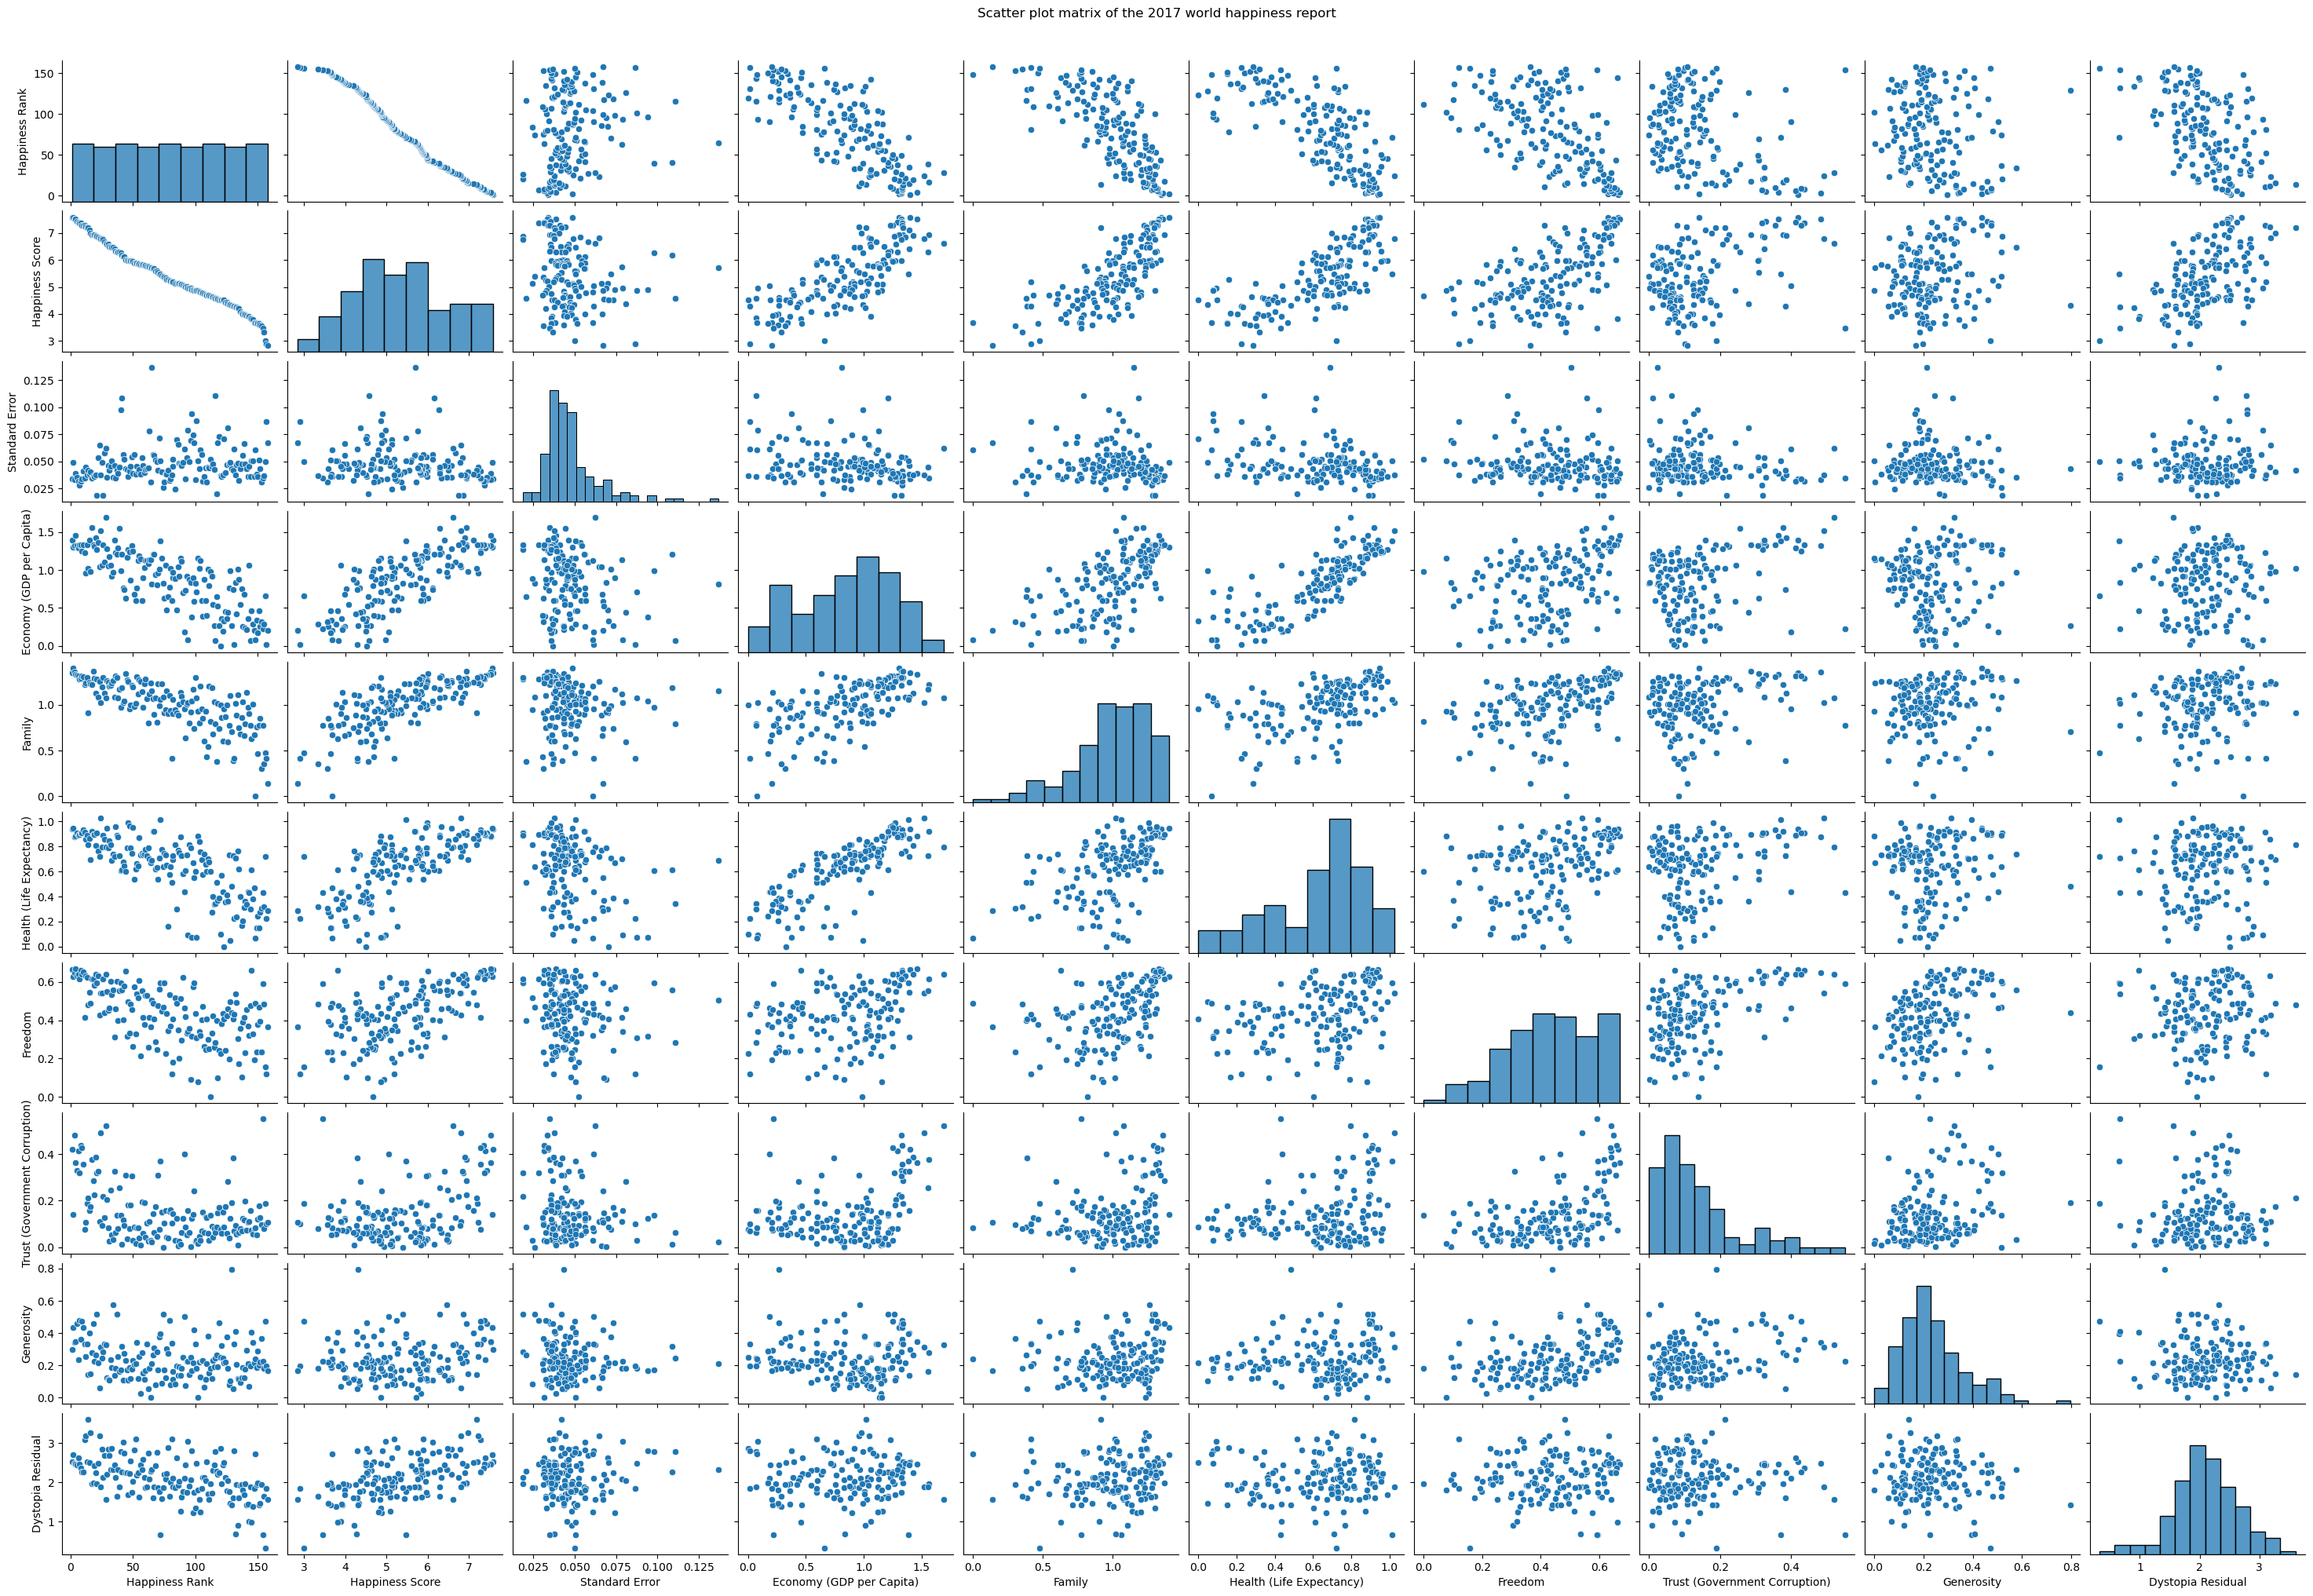

In [9]:
# create a pairplot for the selected columns
sns.pairplot(happy[columns_of_interest],height=2,aspect=1.5)
plt.suptitle('Scatter plot matrix of the 2017 world happiness report',y=1.02)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# label encoding

In [11]:
le=LabelEncoder()
happy['Region']=le.fit_transform(happy['Region'])
happy['Country']=le.fit_transform(happy['Country'])
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


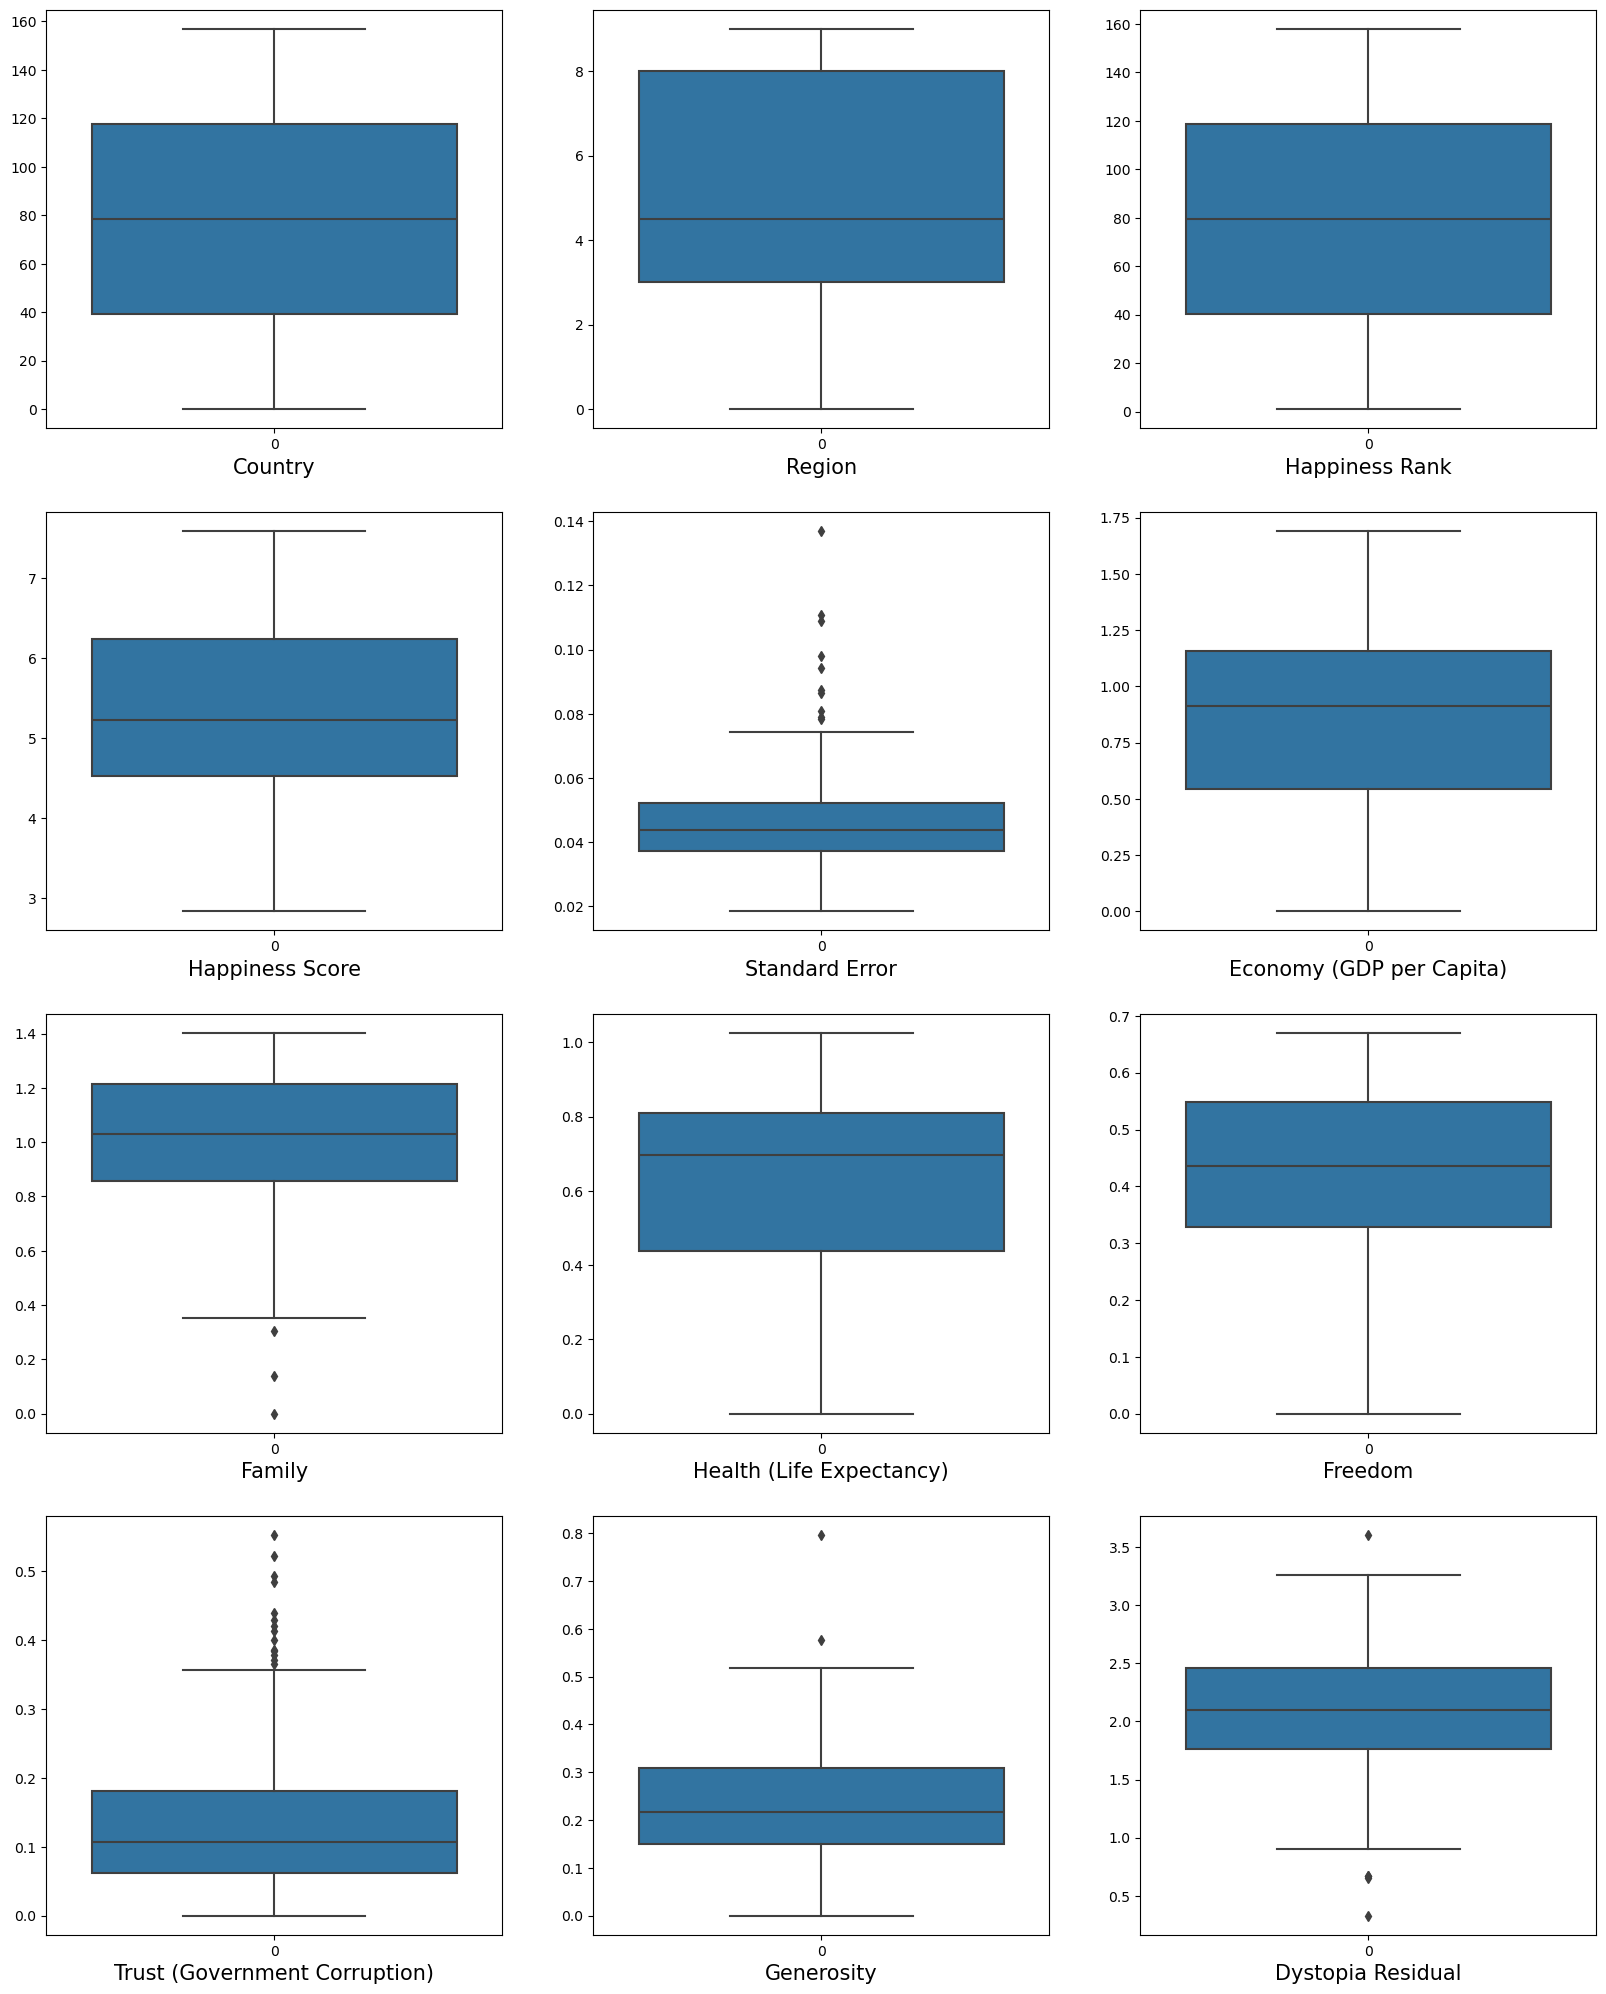

In [12]:
# visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in happy:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=happy[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [13]:
from scipy import stats
import pandas as pd

z_threshold = 3
z_scores = stats.zscore(happy.select_dtypes(include='number'))
outliers = (z_scores > z_threshold).any(axis=1)
cleaned_data = happy[~outliers]
happy


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# model building

In [14]:
x=happy.drop('Happiness Score',axis=1)
y=happy['Happiness Score']
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
 from sklearn.model_selection import train_test_split,GridSearchCV


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)


# accuracy test

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
r2_score(y_train,y_train_pred)*100

100.0

In [22]:
mean_squared_error(y_train,y_train_pred)

0.0

In [23]:
r2_score(y_test,y_test_pred)*100

98.6908879357586

In [24]:
mean_squared_error(y_test,y_test_pred)

0.017422675000000026

In [25]:
# mean absolute  error MAE
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.1319949809651868

# xgboost model

In [26]:
xg_reg=xgb.XGBRFRegressor()

In [27]:
xg_reg.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [28]:
y_train_pred=xg_reg.predict(x_train)
y_test_pred=xg_reg.predict(x_test)

In [29]:
r2_score(y_train,y_train_pred)*100

99.94542122330826

In [30]:
mean_squared_error(y_train,y_train_pred)

0.0006997629620251805

In [31]:
r2_score(y_test,y_test_pred)*100

99.40093173742504

In [32]:
mean_squared_error(y_test,y_test_pred)

0.007972863383324147

# linear regression

In [33]:
reg=LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

In [36]:
r2_score(y_train,y_train_pred)*100

99.99999417268455

In [37]:
mean_squared_error(y_train,y_train_pred)

7.47129152536151e-08

In [38]:
r2_score(y_test,y_test_pred)*100

99.99999462890007

In [39]:
mean_squared_error(y_test,y_test_pred)

7.148274852751689e-08

from all the above various type of model  linearregression is performing best

# FUTURE IMPLICATIONS

The insights gathered from the analysis have the potential to significantly impact policymaking, public well-being, and the global perception of happiness as a fundamental goal. By shedding light on societal happiness and its determinants, the report can guide governments and organizations in shaping future policies and initiatives that prioritize the happiness and well-being of citizens. Furthermore, the integration of Al and ML into the analysis of happiness trends can contribute to a deeper understanding of these dynamics, potentially revolutionizing how happiness is measured and achieved. As we contemplate the future, this slide emphasizes the central role that the World Happiness Report and advanced technologies will play in shaping the well-being landscape.

# CHALLENGES AND ETHICAL CONSIDERATIONS

• Challenges include integrating diverse and complex data sources, addressing biases, and ensuring data quality.

• Al and ML are crucial for automating data preprocessing tasks, which save time and enhance data accuracy.

• Ethical considerations are paramount especially when handling personal survey data, to ensure data privacy and protection.

• A balanced approach is necessary when using Al and ML, respecting ethical obligations and potential pitfalls related to data collection and processing.

• Ethical integrity should be maintained to uphold the credibility of our research and findings.

# CONCLUSION

In closing, this presentation has shed light on the critical role of Al and Machine Learning in understanding global happiness trends through the World Happiness Report. We've discussed the significance of this report as a fundamental tool for measuring well-being and its impact on informing policy decisions and fostering public well-being. Furthermore, we've explored how Al and ML are poised to shape the future of happiness reports, offering advanced insights and predictions. Throughout our journey, we've underscored the importance of maintaining ethical standards and data privacy in the pursuit of happiness analysis. As we conclude, let us envision a future where advanced technologies and ethical considerations harmoniously work together to drive happiness and well-being to new heights on a global scale.